In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
sns.set()
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append("/content/drive/MyDrive/CS142 Network/dataset_SuperRare")
!ls /content/drive/MyDrive/'CS142 Network'/dataset_SuperRare

#on-colab Dataframe loading
sales_data = pd.read_csv("/content/drive/MyDrive/CS142 Network/dataset_SuperRare/sales.csv")
art_data = pd.read_csv("/content/drive/MyDrive/CS142 Network/dataset_SuperRare/tokens.csv")
bids_data = pd.read_csv("/content/drive/MyDrive/CS142 Network/dataset_SuperRare/bids.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 bids.csv      main.ipynb  'nft graph.ipynb'   sales.csv      tokens.csv
 bids.gsheet   my_util.py   __pycache__        sales.gsheet


In [ ]:
art_data['timestamp'] = art_data['timestamp'].astype('datetime64[ns]')
sales_data['timestamp'] = sales_data['timestamp'].astype('datetime64[ns]')

# sort data by timestamp
sales_data = sales_data.sort_values(by = 'timestamp')

# reset index (drop original index)
sales_data = sales_data.reset_index(drop = True)

sales_data

,timestamp,tokenId,buyer,seller,eth,rate,usd,contract,transactionId
0,2018-04-05 23:50:12,1,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0.4600,381.36,175.42560,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0xf1097e3617632e43b7c0a46ffeb4d741d0a67b25fb06...
1,2018-04-05 23:59:06,2,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0.4600,381.36,175.42560,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x9e9befc01fe11425ae8a2b903c8f8e1ec9777157d3e9...
2,2018-04-06 00:17:36,3,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0.4600,370.35,170.36100,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x66e9ac3a5d651123398f274ffecfccbbb86f04748c70...
3,2018-04-06 02:24:16,4,0xbc74c3adc2aa6a85bda3eca5b0e235ca08532772,0x860c4604fe1125ea43f81e613e7afb2aa49546aa,0.4600,370.35,170.36100,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x0f4efbc5a8350e36e8ed03225f643b32544254add8c6...
4,2018-04-14 17:31:58,17,0x337101def3eeb6f06e071efe02216274507937bb,0x21316e6a4f0af45e5f1503984e83b10c53b177d8,0.4230,502.79,212.68017,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x6c01b80f7f8abf7e7668cda5178fbe45c5901f5c8dae...
...,...,...,...,...,...,...,...,...,...
17524,2021-03-26 13:54:05,22230,0x3eb18413d536d7ab03320300598de457fa078ab2,0xca49240330b460a7f804854c58921219df6f47c8,2.1000,NaN,NaN,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,0x42599375ab5e81757432ea2b18c248d122d404fdba78...
17525,2021-03-26 14:11:25,9625,0x4e7b8d5dfbef53faca35bbb2400785e93a6ef5aa,0x884232cdb27f593cd8a7b7cfe8f6785d85fc9fc5,1.2500,NaN,NaN,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,0xd2b1eafc866b3db5710d3b7ea5f30bd84d54713a1a6b...
17526,2021-03-26 15:08:31,887,0x68b498a5ebcd1f649a7ae3f4f42d33fe067fb483,0xa353401738e7ec6a4db9c0ee4c66eb5252f681c4,2.9900,NaN,NaN,0x41a322b28d0ff354040e2cbc676f0320d8c8850d,0x2cac0258142b7fd602e1042b93ea696e706681025be6...
17527,2021-03-26 15:19:41,6136,0x8f903cfc0af3c2ec0d872c57538af5e071544a57,0x2c775bcdaaf5ebebe73313f50671c6e09f05f824,0.4200,NaN,NaN,0xb932a70a57673d89f4acffbe830e8ed7f75fb9e0,0x0e211126fe945285a7781a72a8df54fa2ff8059050c6...


In [ ]:
G2 = nx.MultiDiGraph()

# add edges
for i in range(len(sales_data[:2]) - 1):
    if np.isnan(sales_data["usd"][i]):
        break
    
    curr = i + 1
    while (sales_data["timestamp"][curr] - sales_data['timestamp'][i]).days < 30:
        if (sales_data["tokenId"][i] != sales_data["tokenId"][curr]) and (not np.isnan(sales_data["usd"][curr])):
            if (sales_data["usd"][i] > sales_data["usd"][curr]):
                G2.add_edge(sales_data["tokenId"][i], sales_data["tokenId"][curr])
            elif (sales_data["usd"][i] < sales_data["usd"][curr]):
                G2.add_edge(sales_data["tokenId"][curr], sales_data["tokenId"][i])
        curr += 1


In [ ]:
nx.info(G2)

'MultiDiGraph with 30 nodes and 30 edges'

In [ ]:
nx.number_strongly_connected_components(G2)

29

In [ ]:
print("Size of strongly connected components(with size > 1):")
for i in nx.strongly_connected_components(G2):
  if len(i)>1:
    print(len(i), end=' ')
print()
print("Is weakly connected? " + str(nx.is_weakly_connected(G2)) + ". Number of components: " + str(nx.number_weakly_connected_components(G2)))
print("Size of weakly connected components(with size > 1):")
for i in nx.weakly_connected_components(G2):
  if len(i)>1:
    print(len(i), end=' ')

Size of strongly connected components(with size > 1):
2 
Is weakly connected? True. Number of components: 1
Size of weakly connected components(with size > 1):
30 

<ipython-input-28-b3e61c57c3a7>:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


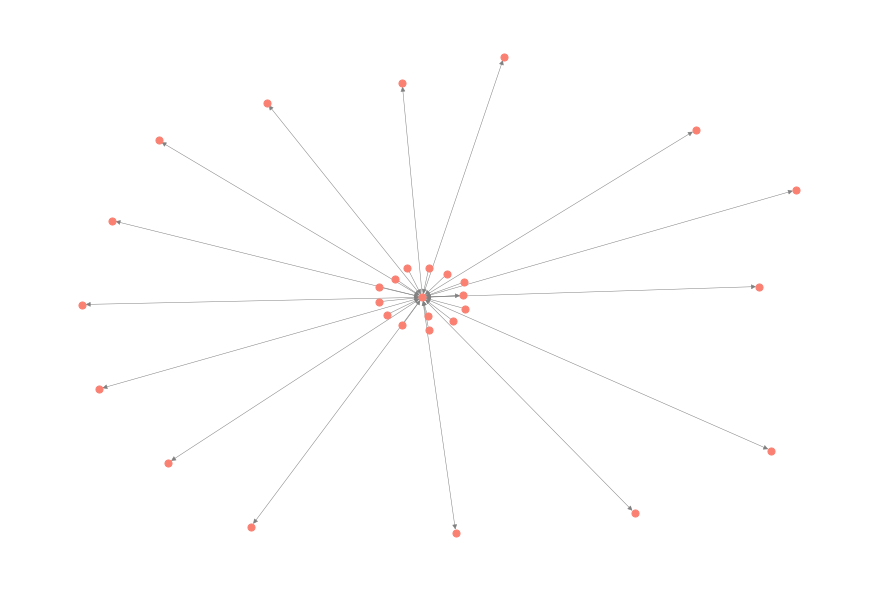

In [ ]:
# visualize
layout = nx.spring_layout(G2)
plt.figure(figsize = (12, 8))
nx.draw(G2, layout, node_color='salmon', edge_color = 'grey', width = 0.5, node_size = 50, 
        edge_cmap = plt.cm.Blues, arrowsize = 10)

plt.tight_layout()
plt.show()